In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neighbors, tree, naive_bayes
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

C:\Users\Yingting-PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Yingting-PC\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
os.chdir('E:\courses\CSC529 Advanced Data mining\case study1\carinsurance')

In [3]:
df=pd.read_csv('carInsurance_train.csv')

In [4]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


## Data exploration

In [5]:
df.describe(include='all')

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
count,4000.000000,4000.000000,3981,4000,3831,4000.000000,4000.000000,4000.00000,4000.000000,3098,4000.000000,4000,4000.000000,4000.000000,4000.000000,958,4000,4000,4000.000000
unique,NaN,NaN,11,3,3,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN,NaN,3,3777,3764,NaN
top,NaN,NaN,management,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,failure,17:02:39,10:52:24,NaN
freq,NaN,NaN,893,2304,1988,NaN,NaN,NaN,NaN,2831,NaN,1049,NaN,NaN,NaN,437,3,3,NaN
mean,2000.500000,41.214750,NaN,NaN,NaN,0.014500,1532.937250,0.49275,0.133000,NaN,15.721250,NaN,2.607250,48.706500,0.717500,NaN,NaN,NaN,0.401000
std,1154.844867,11.550194,NaN,NaN,NaN,0.119555,3511.452489,0.50001,0.339617,NaN,8.425307,NaN,3.064204,106.685385,2.078647,NaN,NaN,NaN,0.490162
min,1.000000,18.000000,NaN,NaN,NaN,0.000000,-3058.000000,0.00000,0.000000,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
25%,1000.750000,32.000000,NaN,NaN,NaN,0.000000,111.000000,0.00000,0.000000,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
50%,2000.500000,39.000000,NaN,NaN,NaN,0.000000,551.500000,0.00000,0.000000,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
75%,3000.250000,49.000000,NaN,NaN,NaN,0.000000,1619.000000,1.00000,0.000000,NaN,22.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN,NaN,1.000000


In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.dtypes

Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [8]:
for i in ['Default','HHInsurance','CarLoan','CarInsurance']:
    df[i]=df[i].astype('object')

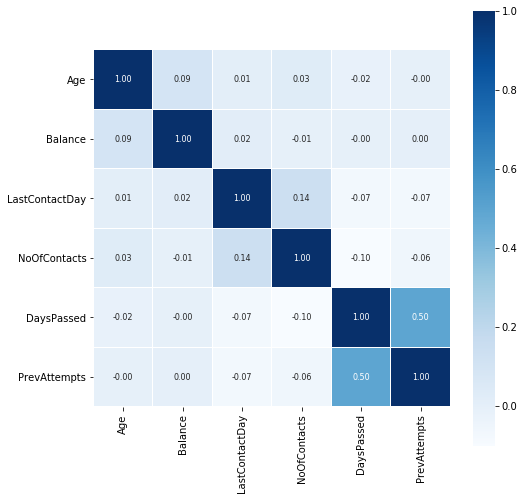

In [9]:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap=plt.cm.Blues,annot=True,fmt='.2f',square=True,annot_kws={'size':8},linewidths=0.1)

In [10]:
# create new features
df['CallLength']=(pd.to_datetime(df.CallEnd)-pd.to_datetime(df.CallStart))/np.timedelta64(1,'m')
df['CallHour']=df.CallStart.str[:2]

C:\Users\Yingting-PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


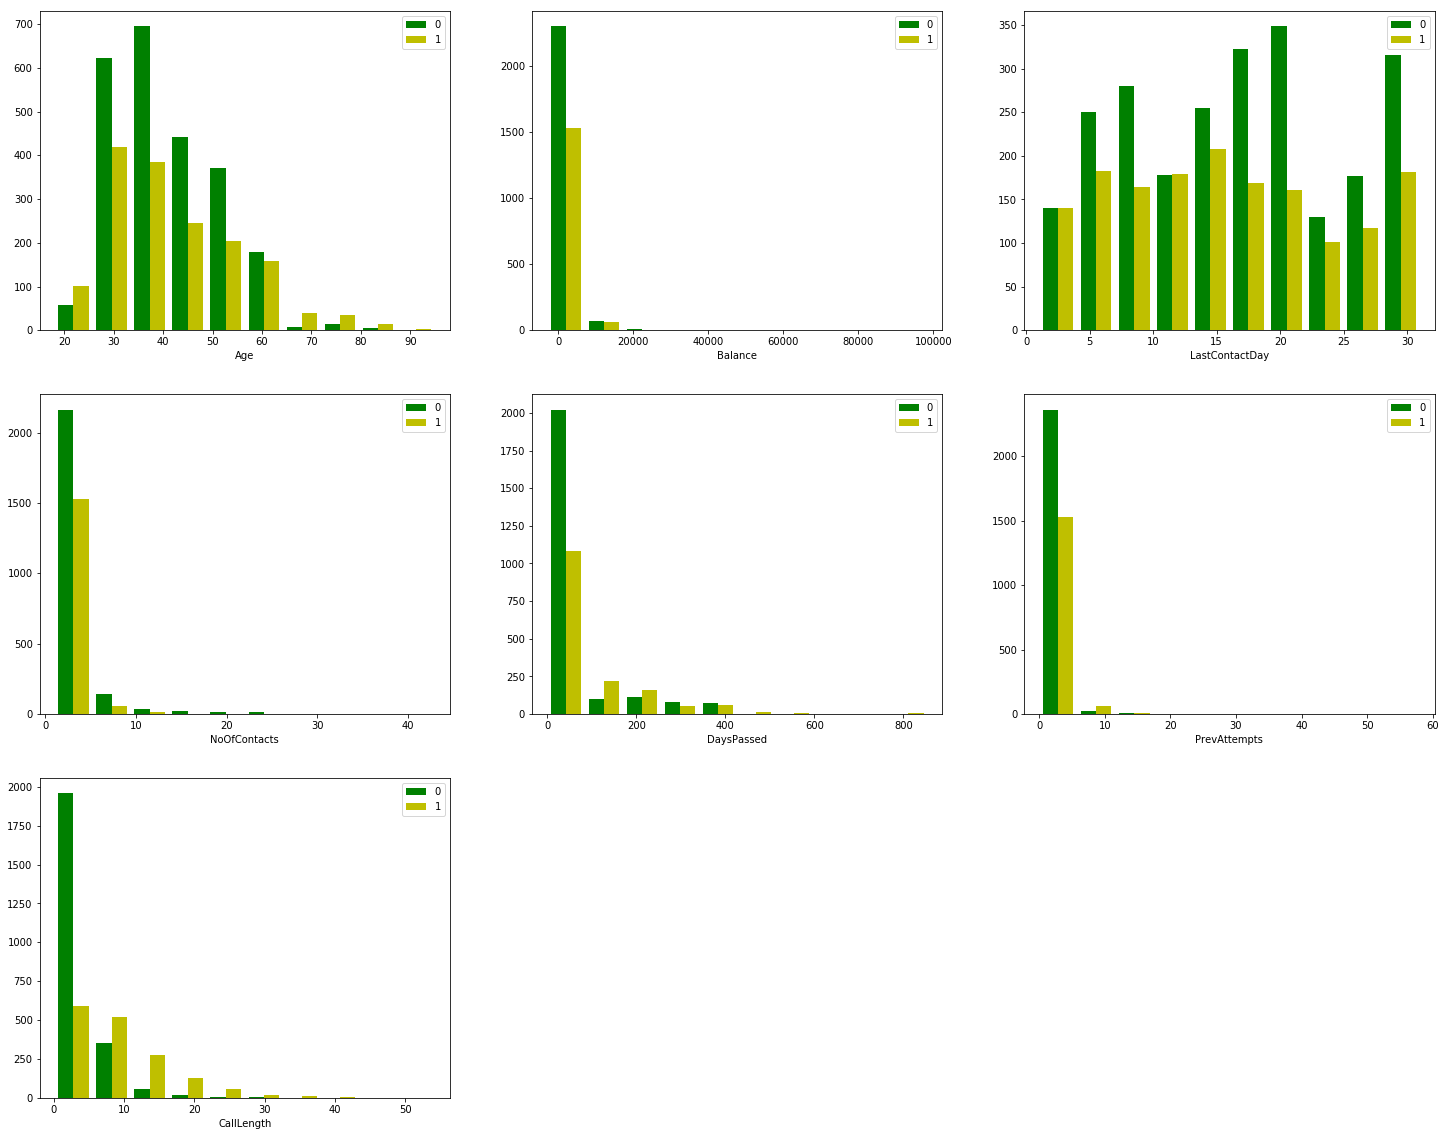

In [11]:
feat=df.select_dtypes(exclude=['object']).columns
fig = plt.figure(figsize=(25,20))
for i in range(len(feat)):
    ax=fig.add_subplot(3, 3, i+1)
    x1=df[df['CarInsurance']==0][feat[i]]
    x2=df[df['CarInsurance']==1][feat[i]]
    ax.hist([x1, x2], color=['g','y'], label=['0','1'])
    ax.set_xlabel(feat[i])
    ax.legend()

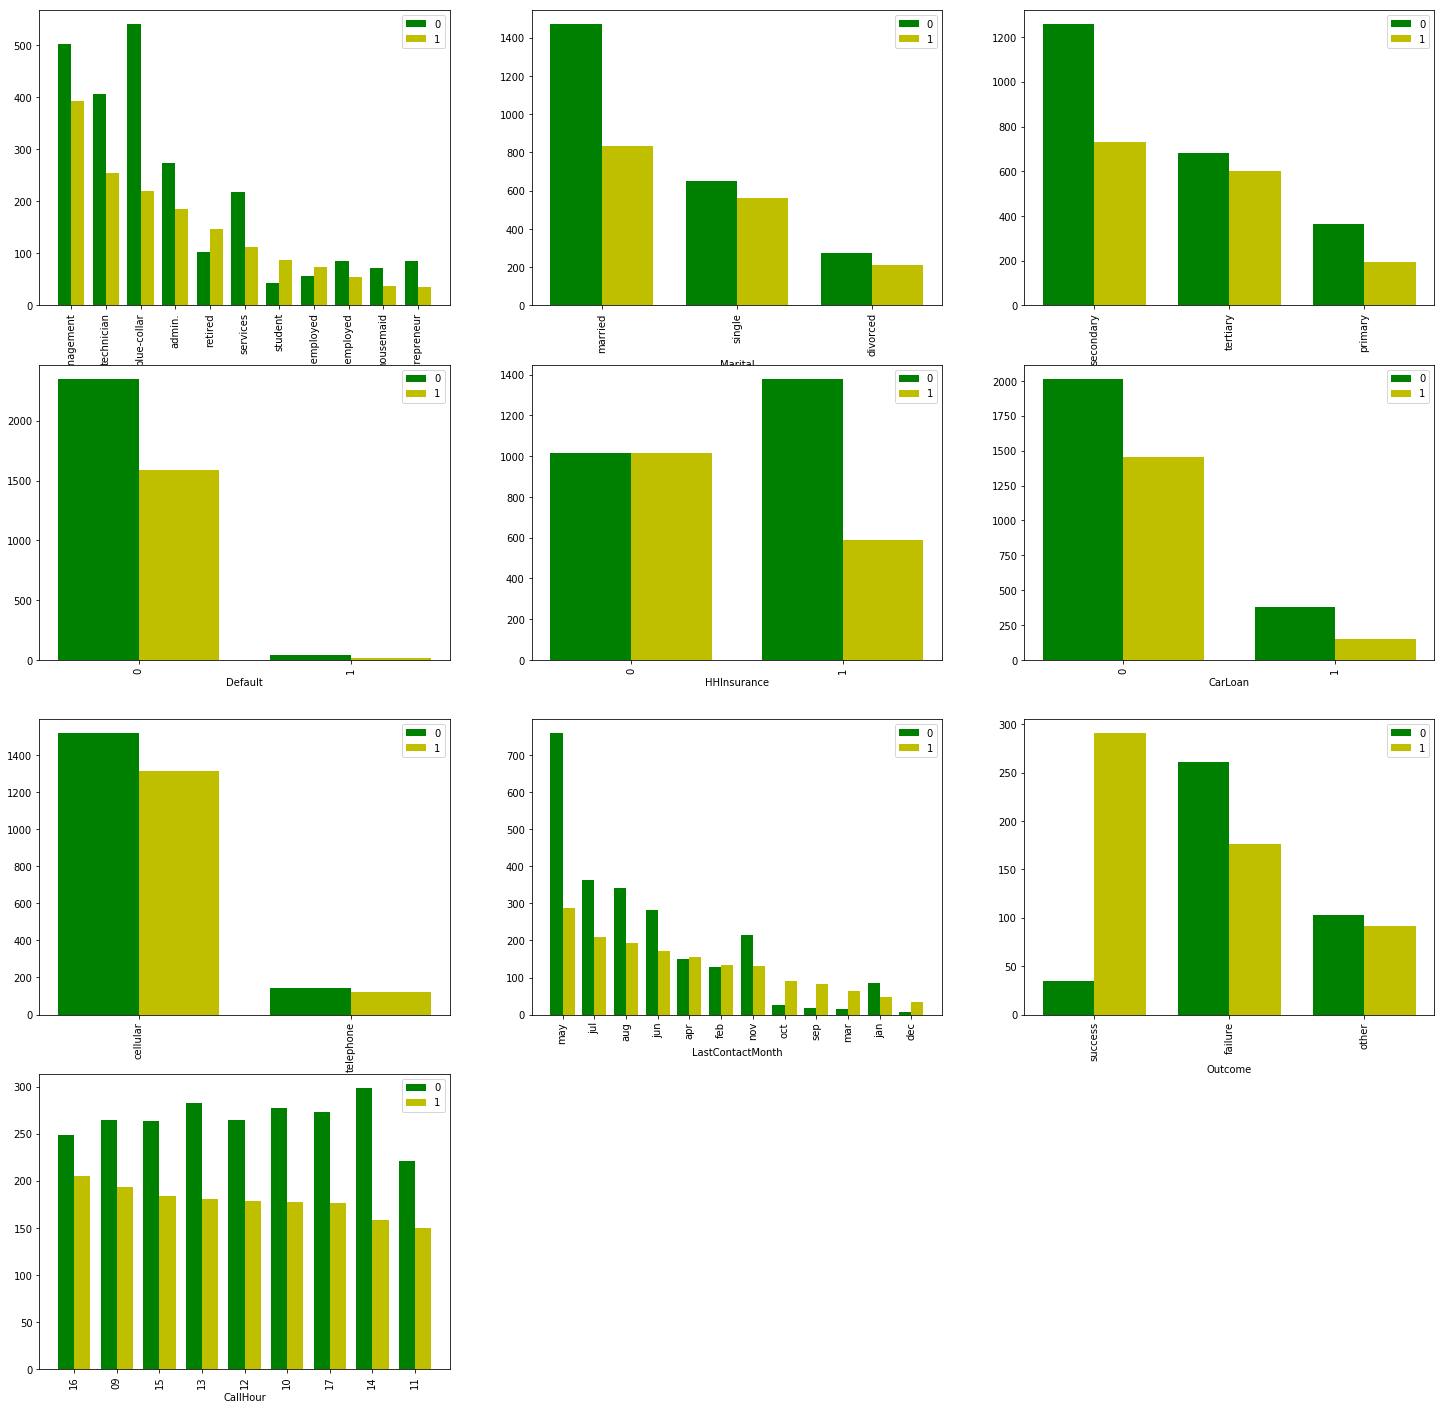

In [12]:
feat=df.select_dtypes(include=['object']).columns.drop(['CarInsurance','CallStart','CallEnd'])
fig = plt.figure(figsize=(25,25))
for i in range(len(feat)):
    ax=fig.add_subplot(4, 3, i+1)
    fea_ct=pd.crosstab(df[feat[i]],df.CarInsurance).sort_values(1,ascending=False)
    width=0.38
    ind=np.arange(len(fea_ct.index))
    ax.bar(ind,fea_ct.iloc[:,0],width,color=['g'], label=0)
    ax.bar(ind+width,fea_ct.iloc[:,1],width,color=['y'], label=1)
    ax.set_xlabel(feat[i])
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(fea_ct.index.tolist())
    ax.legend()
    plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')

## Deal with missing values

In [13]:
pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing Value Count'])

,Missing Value Count
Job,19
Education,169
Communication,902
Outcome,3042


In [14]:
df.Outcome.fillna('NoPreAtmp',inplace=True)
df.Communication.fillna('cellular',inplace=True)

In [15]:
#fill null in Education according to the most-frequent Education level for a job
edu_mode=[]
job_types = df.Job.unique().tolist()
job_types.remove(np.nan)
for job in job_types:
    mode=df[df.Job==job].Education.mode()[0]
    edu_mode.append(mode)

edu_map=dict(zip(job_types,edu_mode))

for job in job_types:
    df.loc[(df.Education.isnull())&(df.Job==job),'Education']=edu_map[job]

df.Education.fillna('None',inplace=True)
df.Job.fillna('None',inplace=True)

In [16]:
# Double check missing values
pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing Value Count'])

,Missing Value Count


## Dummies Variables

In [17]:
dff=df.drop(['CallEnd','CallStart','LastContactDay','CarInsurance'],axis=1)
dff=pd.get_dummies(dff)
dff.shape

(4000, 58)

## Split Data and Normalization

In [18]:
x_=np.array(dff)
y_=df['CarInsurance'].astype(int)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_,y_,test_size=0.2, random_state=33)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 58)
(800, 58)
(3200,)
(800,)


In [20]:
x_norm =preprocessing.MinMaxScaler()
x_train_nr=x_norm.fit(x_train).transform(x_train)
x_test_nr=x_norm.fit(x_train).transform(x_test)
y_train_=y_train.as_matrix()
y_test_=y_test.as_matrix()

## Decision Tree

In [21]:
# cross validation function
def cv(x,y,k,clf,metric):
    kf = KFold(len(x), n_folds=k,random_state=33)
    _train=[]
    _test=[]
    for train,test in kf:
        clf.fit(x[train],y[train])
        _train.append(metric(y[train],clf.predict(x[train])))
        _test.append(metric(y[test],clf.predict(x[test])))
    return _train, _test

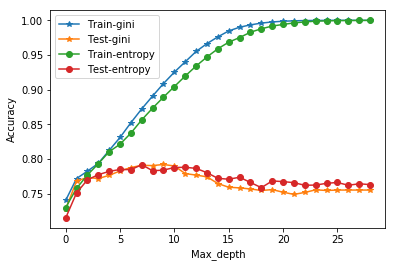

In [22]:
train_gini=[]
test_gini=[]
train_entr=[]
test_entr=[]

for i in range(1,30):
    for j in ['gini','entropy']:
        dt=tree.DecisionTreeClassifier(criterion=j,max_depth=i,random_state=33)
        _train,_test=cv(x_train_nr,y_train_,10,dt,metrics.accuracy_score)
        if j== 'gini':
            train_gini.append(np.mean(_train))
            test_gini.append(np.mean(_test))
        else:
            train_entr.append(np.mean(_train))
            test_entr.append(np.mean(_test))

plt.plot(train_gini,'*-',label='Train-gini',)
plt.plot(test_gini,'*-',label='Test-gini')
plt.plot(train_entr,'o-',label='Train-entropy')
plt.plot(test_entr,'o-',label='Test-entropy')
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.legend(loc=2)

Bsed on training and test set performance, criterion='gini',max_depth=6 are a good choice

Text(0,0.5,'Accuracy')

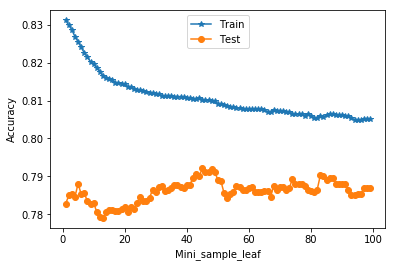

In [23]:
train=[]
test=[]
for i in range(1,100):
    dt=tree.DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=i,random_state=33)
    _train,_test=cv(x_train_nr,y_train_,10,dt,metrics.accuracy_score)
    train.append(np.mean(_train))
    test.append(np.mean(_test))

plt.plot(range(1,100),train,'*-',label='Train')
plt.plot(range(1,100),test,'o-',label='Test')
plt.legend(loc=9)
plt.xlabel("Mini_sample_leaf")
plt.ylabel("Accuracy")

Accuracy of training set goes down all the way, test set doesn't improve a lot as number of leaves increase. So choose small Mini sample leaf number will be fine.

In [24]:
def performance(best_clf):
    best_clf.fit(x_train_nr,y_train_)
    pred_train=best_clf.predict(x_train_nr)
    pred_test=best_clf.predict(x_test_nr)
    
    train_accu=metrics.accuracy_score(y_train_,pred_train)
    test_accu=metrics.accuracy_score(y_test_,pred_test)
    
    print('Training set accuracy is: ',train_accu)
    print(metrics.classification_report(y_train_,pred_train))
    print('Test set accuracy is: ',test_accu)
    print(metrics.classification_report(y_test_,pred_test))

In [25]:
dt_best=tree.DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=5,random_state=33)
performance(dt_best)

Training set accuracy is:  0.82125
             precision    recall  f1-score   support

          0       0.83      0.88      0.86      1916
          1       0.80      0.73      0.77      1284

avg / total       0.82      0.82      0.82      3200

Test set accuracy is:  0.82625
             precision    recall  f1-score   support

          0       0.84      0.87      0.86       480
          1       0.80      0.76      0.78       320

avg / total       0.83      0.83      0.83       800



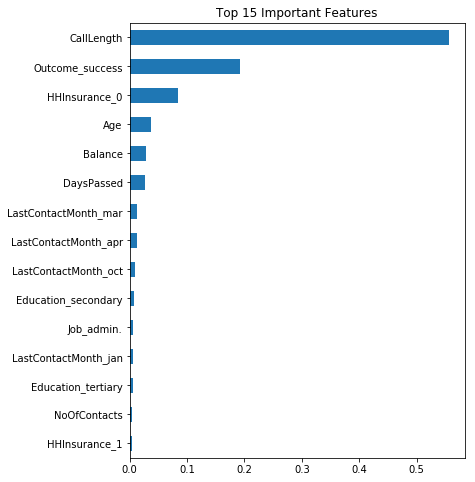

In [26]:
features=dff.columns.tolist()
fea_imp=pd.Series(dt_best.feature_importances_,index=features).nlargest(15).sort_values()
fea_imp.plot(kind="barh",figsize=(6,8),title="Top 15 Important Features")

## Random Forest

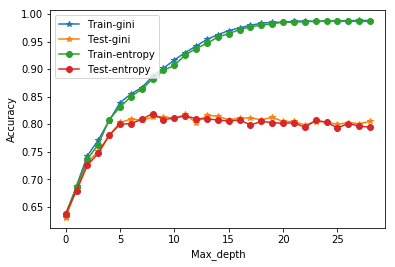

In [27]:
train_gini=[]
test_gini=[]
train_entr=[]
test_entr=[]

for i in range(1,30):
    for j in ['gini','entropy']:
        rf=ensemble.RandomForestClassifier(criterion=j,max_depth=i,random_state=33)
        _train,_test=cv(x_train_nr,y_train_,10,rf,metrics.accuracy_score)
        if j== 'gini':
            train_gini.append(np.mean(_train))
            test_gini.append(np.mean(_test))
        else:
            train_entr.append(np.mean(_train))
            test_entr.append(np.mean(_test))

plt.plot(train_gini,'*-',label='Train-gini',)
plt.plot(test_gini,'*-',label='Test-gini')
plt.plot(train_entr,'o-',label='Train-entropy')
plt.plot(test_entr,'o-',label='Test-entropy')
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.legend(loc=2)

Entropy works a little bit better, Max_depth around 8 has the best test accuracy

In [28]:
# use grid search to find the best parameter combination
gsmd = np.array([int(e) for e in np.linspace(1, 10, 10)])
gsmsl = np.array([int(e) for e in np.linspace(1, 10, 10)])
parameters = {
    'criterion': ['gini'],
    'max_depth': gsmd,
    'min_samples_leaf': gsmsl,
}
rf=ensemble.RandomForestClassifier(random_state=33)
gs = GridSearchCV(rf, parameters,cv=10,scoring='accuracy')

gs.fit(x_train_nr, y_train_)
gs.best_params_,gs.best_score_

({'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3}, 0.8178125)

In [29]:
rf_best=ensemble.RandomForestClassifier(criterion='gini',max_depth=9,min_samples_leaf=3,random_state=33)
performance(rf_best)

Training set accuracy is:  0.865625
             precision    recall  f1-score   support

          0       0.87      0.91      0.89      1916
          1       0.86      0.80      0.83      1284

avg / total       0.87      0.87      0.86      3200

Test set accuracy is:  0.82375
             precision    recall  f1-score   support

          0       0.84      0.87      0.86       480
          1       0.80      0.75      0.77       320

avg / total       0.82      0.82      0.82       800



## Adaptive Boosting

In [31]:
gsest = np.array([int(e) for e in np.linspace(1, 30, 30)])
gslearn = np.array([int(e) for e in np.linspace(1, 5, 5)])
gsmd = np.array([int(e) for e in np.linspace(1, 10, 10)])

ab=ensemble.AdaBoostClassifier(dt_best,random_state=33)
parameters={
    'n_estimators':gsest,
    'learning_rate':gslearn
}
gs=GridSearchCV(ab,parameters,cv=10,scoring='accuracy')

gs.fit(x_train_nr, y_train_)
gs.best_params_,gs.best_score_

({'learning_rate': 1, 'n_estimators': 3}, 0.7965625)

In [32]:
ab_best=ensemble.AdaBoostClassifier(dt_best,n_estimators=3, learning_rate=1, random_state=33)
performance(ab_best)

Training set accuracy is:  0.8640625
             precision    recall  f1-score   support

          0       0.88      0.89      0.89      1916
          1       0.83      0.83      0.83      1284

avg / total       0.86      0.86      0.86      3200

Test set accuracy is:  0.80125
             precision    recall  f1-score   support

          0       0.82      0.85      0.84       480
          1       0.77      0.72      0.74       320

avg / total       0.80      0.80      0.80       800



## Logistic Regression

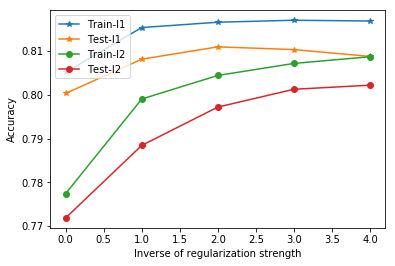

In [33]:
train_l1=[]
test_l1=[]
train_l2=[]
test_l2=[]

for i in [0.1,0.3,0.5,0.7,0.9]:
    for j in ['l1','l2']:
        lg=LogisticRegression(random_state=33,penalty=j,C=i)
        _train,_test=cv(x_train_nr,y_train_,10,lg,metrics.accuracy_score)
        if j== 'l1':
            train_l1.append(np.mean(_train))
            test_l1.append(np.mean(_test))
        else:
            train_l2.append(np.mean(_train))
            test_l2.append(np.mean(_test))

plt.plot(train_l1,'*-',label='Train-l1',)
plt.plot(test_l1,'*-',label='Test-l1')
plt.plot(train_l2,'o-',label='Train-l2')
plt.plot(test_l2,'o-',label='Test-l2')
plt.xlabel("Inverse of regularization strength")
plt.ylabel("Accuracy")
plt.legend(loc=2)

In [34]:
lg_best=LogisticRegression(random_state=33,penalty='l1',C=2)
performance(lg_best)

Training set accuracy is:  0.818125
             precision    recall  f1-score   support

          0       0.83      0.88      0.85      1916
          1       0.80      0.72      0.76      1284

avg / total       0.82      0.82      0.82      3200

Test set accuracy is:  0.82125
             precision    recall  f1-score   support

          0       0.83      0.88      0.86       480
          1       0.81      0.73      0.77       320

avg / total       0.82      0.82      0.82       800



## Stacking

In [35]:
stack1=ensemble.VotingClassifier(estimators=[('lg',lg_best),('dt',dt_best),('ab',ab_best),('rf',rf_best)],voting='hard')
stack1_score=cross_val_score(stack1, x_train_nr, y_train_, cv=10,scoring='accuracy')
print ('Stack 1 score:',np.mean(stack1_score))

stack2=ensemble.VotingClassifier(estimators=[('lg',lg_best),('dt',dt_best),('rf',rf_best)],voting='hard')
stack2_score=cross_val_score(stack2, x_train_nr, y_train_, cv=10,scoring='accuracy')
print ('Stack 2 score:',np.mean(stack2_score))

stack3=ensemble.VotingClassifier(estimators=[('lg',lg_best),('dt',dt_best),('rf',rf_best)],voting='soft')
stack3_score=cross_val_score(stack3, x_train_nr, y_train_, cv=10,scoring='accuracy')
print ('Stack 3 score:',np.mean(stack3_score))

Stack 1 score: 0.80902487451
Stack 2 score: 0.822466390663
Stack 3 score: 0.821527923246


In [36]:
stack_best=ensemble.VotingClassifier(estimators=[('lg',lg_best),('dt',dt_best),('rf',rf_best)],voting='hard')
performance(stack_best)

Training set accuracy is:  0.8453125
             precision    recall  f1-score   support

          0       0.86      0.89      0.87      1916
          1       0.83      0.78      0.80      1284

avg / total       0.84      0.85      0.84      3200

Test set accuracy is:  0.8325
             precision    recall  f1-score   support

          0       0.85      0.88      0.86       480
          1       0.81      0.76      0.78       320

avg / total       0.83      0.83      0.83       800



### It seems that all models have very close performance, Stacking slightly won this time..